<a href="https://colab.research.google.com/github/yaseemarusiru/Healthy_Corals_Image_Classification/blob/main/Healthy_Coral_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import necessary libraries**

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 60.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
import tensorflow as tf
import tensorflow.keras.layers as layers
from tensorflow.keras.utils import to_categorical
import streamlit as st
from PIL import Image, ImageOps
import random

backend command in Jupyter Notebooks to enable the rendering of Matplotlib plots directly below code cells

In [ ]:
%matplotlib inline

In [ ]:
np.random.seed(1)
tf.random.set_seed(1)   #to handle the randomness

In [ ]:
pip install opendatasets  #Need this to download dataset from kaggle

In [ ]:
import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/datasets/vencerlanz09/healthy-and-bleached-corals-image-classification") #Kaggle dataset credit to the respective owner

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: yrusiru
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/vencerlanz09/healthy-and-bleached-corals-image-classification


100%|██████████| 25.8M/25.8M [00:00<00:00, 78.3MB/s]


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
test_healthy_dir = '/content/healthy-and-bleached-corals-image-classification/healthy_corals'
test_bleached_dir = '/content/healthy-and-bleached-corals-image-classification/bleached_corals' #paths to the images

In [ ]:
#Getting an idea about the size of the dataset

num_healthy_images = len(os.listdir(test_healthy_dir))
num_bleached_images = len(os.listdir(test_bleached_dir))
total_images = num_healthy_images + num_bleached_images

print(f"Number of healthy corals images: {num_healthy_images}")
print(f"Number of bleached corals images: {num_bleached_images}")
print(f"Total number of images: {total_images}")

Number of healthy corals images: 438
Number of bleached corals images: 485
Total number of images: 923


In [ ]:
#function to load the images with labels and resize
def load_images(path, label):
    images = []
    for file in os.listdir(path):
        if file.endswith('.jpg'): #all images are jpg here
            img = cv2.imread(os.path.join(path, file))
            if img is not None:  # Check if the image is not empty.
                img = cv2.resize(img, (64, 64))  # Resize the image.
                images.append(img)
    return np.array(images), to_categorical(np.array([label] * len(images)), num_classes=2)

bleached_corals, bleached_corals_labels = load_images(test_healthy_dir, 0)
healthy_corals, healthy_corals_labels = load_images(test_bleached_dir, 1)

coral_images = np.concatenate([bleached_corals, healthy_corals])
coral_labels_array = np.concatenate([bleached_corals_labels, healthy_corals_labels ])
coral_labels = np.argmax(coral_labels_array, axis=1)  #convert to a 1D array (n,)

**Train Test Split**

In [ ]:
train_bleached_images = bleached_corals[:int(0.7*num_bleached_images)]  # 70% train images from the whole dataset
train_bleached_labels = bleached_corals_labels[:int(0.7*num_bleached_images)]

train_healthy_images = healthy_corals[:int(0.7*num_healthy_images)]
train_healthy_labels = healthy_corals_labels[:int(0.7*num_healthy_images)]

train_images = np.concatenate([train_bleached_images, train_healthy_images])
train_labels_array = np.concatenate([train_bleached_labels, train_healthy_labels])
train_labels = np.argmax(train_labels_array, axis=1)

print(f"train images shape: {train_images.shape}, train labels shape: {train_labels.shape}")

test_bleached_images = bleached_corals[int(0.7*num_bleached_images):] # 30% test images from the whole dataset
test_bleached_labels = bleached_corals_labels[int(0.7*num_bleached_images):]

test_healthy_images = healthy_corals[int(0.7*num_healthy_images):]
test_healthy_labels = healthy_corals_labels[int(0.7*num_healthy_images):]

test_images = np.concatenate([test_bleached_images, test_healthy_images])
test_labels_array = np.concatenate([test_bleached_labels, test_healthy_labels])
test_labels = np.argmax(test_labels_array, axis=1)

print(f"test images shape: {test_images.shape}, test labels shape: {test_labels.shape}")

train images shape: (645, 64, 64, 3), train labels shape: (645,)
test images shape: (277, 64, 64, 3), test labels shape: (277,)


In [ ]:
X_train = train_images/255. # Normalize image vectors
X_test = test_images/255.

Y_train = train_labels.T.reshape(-1,1)  #should reshape the labels to (n,1)
Y_test = test_labels.T.reshape(-1,1)

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 645
number of test examples = 277
X_train shape: (645, 64, 64, 3)
Y_train shape: (645, 1)
X_test shape: (277, 64, 64, 3)
Y_test shape: (277, 1)


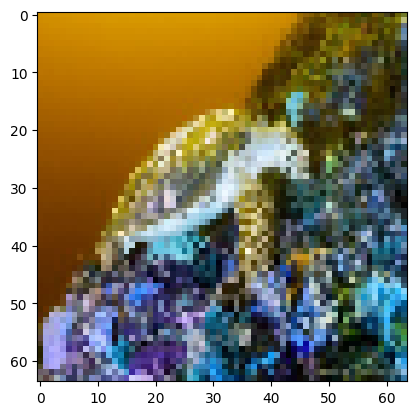

In [ ]:
index = 124
plt.imshow(train_images[index]) #display sample training image
plt.show()

In [ ]:
#CNN model
model = tf.keras.Sequential([
            ## ZeroPadding2D with padding 3, input shape of 64 x 64 x 3
            layers.ZeroPadding2D(padding=3, input_shape=(64,64,3)),
            ## Conv2D with 32 7x7 filters and stride of 1
            layers.Conv2D(strides = 1, filters = 32, kernel_size = 7),
            ## BatchNormalization for axis 3
            layers.BatchNormalization(axis = 3),
            ## ReLU
            layers.ReLU(),
            ## Max Pooling 2D with default parameters
            layers.MaxPooling2D(),
            ## Flatten layer
            layers.Flatten(),
            ## Dense layer with 1 unit for output & 'sigmoid' activation
            layers.Dense(units = 1,activation = 'sigmoid')
        ])

In [ ]:
model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPaddin  (None, 70, 70, 3)         0         
 g2D)                                                            
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        4736      
                                                                 
 batch_normalization (Batch  (None, 64, 64, 32)        128       
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                        

In [ ]:
model.fit(X_train, Y_train, epochs=10, batch_size=16, shuffle = True) #fit the model

Epoch 1/10
41/41 [==============================] - 10s 220ms/step - loss: 2.1032 - accuracy: 0.6171
Epoch 2/10
41/41 [==============================] - 9s 228ms/step - loss: 0.8970 - accuracy: 0.7008
Epoch 3/10
41/41 [==============================] - 8s 194ms/step - loss: 0.9719 - accuracy: 0.7023
Epoch 4/10
41/41 [==============================] - 5s 121ms/step - loss: 0.5751 - accuracy: 0.7798
Epoch 5/10
41/41 [==============================] - 9s 212ms/step - loss: 0.4040 - accuracy: 0.8326
Epoch 6/10
41/41 [==============================] - 9s 225ms/step - loss: 0.3099 - accuracy: 0.8713
Epoch 7/10
41/41 [==============================] - 5s 124ms/step - loss: 0.3595 - accuracy: 0.8388
Epoch 8/10
41/41 [==============================] - 9s 212ms/step - loss: 0.2621 - accuracy: 0.8915
Epoch 9/10
41/41 [==============================] - 7s 174ms/step - loss: 0.2382 - accuracy: 0.9008
Epoch 10/10
41/41 [==============================] - 5s 110ms/step - loss: 0.1847 - accuracy: 0.922

In [ ]:
model.evaluate(X_test, Y_test)  #see how well model does with test data

9/9 [==============================] - 1s 46ms/step - loss: 0.9948 - accuracy: 0.6354


[0.9947835803031921, 0.6353790760040283]

## **Using MobilNet**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import tensorflow.keras.layers as tfl

from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation

In [ ]:
train_dataset = image_dataset_from_directory("/content/healthy-and-bleached-corals-image-classification/",
                                             shuffle=True,
                                             batch_size=32,
                                             image_size=(160,160),
                                             validation_split=0.2,
                                             subset='training',
                                             seed=42)
validation_dataset = image_dataset_from_directory("/content/healthy-and-bleached-corals-image-classification/",
                                             shuffle=True,
                                             batch_size=32,
                                             image_size=(160,160),
                                             validation_split=0.2,
                                             subset='validation',
                                             seed=42)

Found 923 files belonging to 2 classes.
Using 739 files for training.
Found 923 files belonging to 2 classes.
Using 184 files for validation.


looking at some images from the dataset

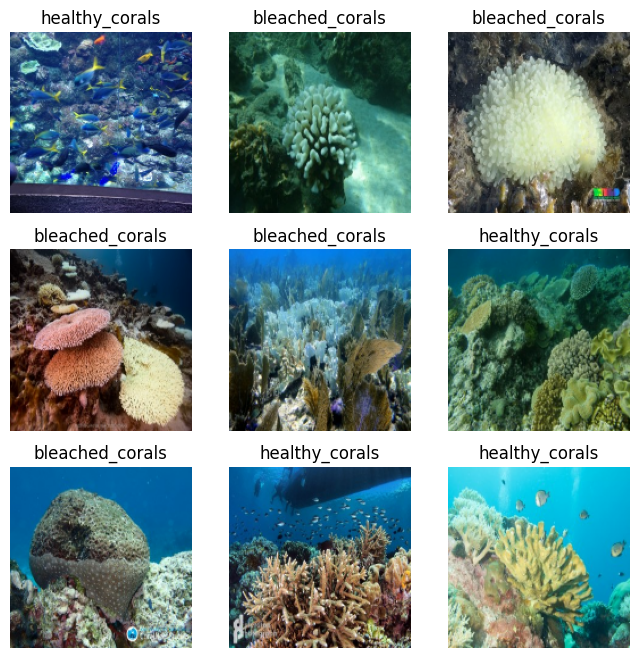

In [ ]:
class_names = train_dataset.class_names

plt.figure(figsize=(8, 8))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

Data Pre processing

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)

In [ ]:
augmentation = tf.keras.Sequential([layers.RandomFlip("horizontal_and_vertical"), layers.RandomRotation(0.2)])

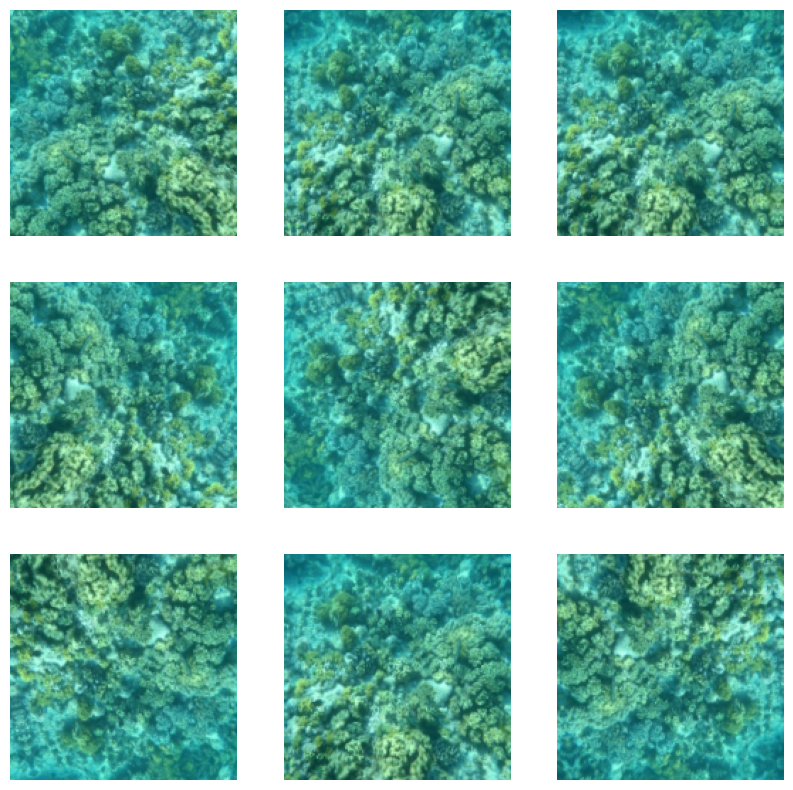

In [ ]:
for image, _ in train_dataset.take(1):
    plt.figure(figsize=(10, 10))
    first_image = image[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = augmentation(tf.expand_dims(first_image, 0))
        plt.imshow(augmented_image[0] / 255)
        plt.axis('off')

In [ ]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [ ]:
IMG_SHAPE = (160,160) + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=True,
                                               weights='imagenet')

14536120/14536120 [==============================] - 0s 0us/step


In [ ]:
image_batch, label_batch = next(iter(train_dataset))
base_model.trainable = False
image_var = tf.Variable(preprocess_input(image_batch))
pred = base_model(image_var)

tf.keras.applications.mobilenet_v2.decode_predictions(pred.numpy(), top=2)

35363/35363 [==============================] - 0s 0us/step


[[('n09256479', 'coral_reef', 0.9642099),
  ('n10565667', 'scuba_diver', 0.004824379)],
 [('n01917289', 'brain_coral', 0.68308043),
  ('n09256479', 'coral_reef', 0.12001561)],
 [('n09256479', 'coral_reef', 0.19638242),
  ('n02643566', 'lionfish', 0.09317402)],
 [('n09256479', 'coral_reef', 0.5591873),
  ('n01917289', 'brain_coral', 0.1921028)],
 [('n09256479', 'coral_reef', 0.93913263),
  ('n01917289', 'brain_coral', 0.009081714)],
 [('n09256479', 'coral_reef', 0.8080021),
  ('n01751748', 'sea_snake', 0.061247345)],
 [('n09256479', 'coral_reef', 0.89550024),
  ('n01917289', 'brain_coral', 0.027002208)],
 [('n09256479', 'coral_reef', 0.6460486),
  ('n01496331', 'electric_ray', 0.052402876)],
 [('n01914609', 'sea_anemone', 0.83815205),
  ('n09256479', 'coral_reef', 0.016947389)],
 [('n09256479', 'coral_reef', 0.9796701),
  ('n01917289', 'brain_coral', 0.0037524034)],
 [('n09256479', 'coral_reef', 0.5099986),
  ('n01917289', 'brain_coral', 0.26770315)],
 [('n09256479', 'coral_reef', 0.496

In [ ]:
new_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                                   include_top=False, # <== Important!!!!
                                                   weights='imagenet') # From imageNet

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
new_model.trainable = False
# create the input layer (Same as the imageNetv2 input size)
inputs = tf.keras.Input(shape=(160,160,3))

# apply data augmentation to the inputs
x = augmentation(inputs)

# data preprocessing using the same weights the model was trained on
x = preprocess_input(x)

# set training to False to avoid keeping track of statistics in the batch norm layer
x = new_model(x, training=False)

# add the new Binary classification layers
# use global avg pooling to summarize the info in each channel
x = tf.keras.layers.GlobalAveragePooling2D()(x)
# include dropout with probability of 0.2 to avoid overfitting
x = tf.keras.layers.Dropout(0.2)(x)

# use a prediction layer with one neuron (as a binary classifier only needs one)
outputs = tf.keras.layers.Dense(1,activation='sigmoid')(x)
outputs = np.argmax(outputs)
### END CODE HERE

model2 = tf.keras.Model(inputs, outputs)

In [ ]:
base_learning_rate = 0.001
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
initial_epochs = 5
history = model2.fit(train_dataset, validation_data=validation_dataset, epochs=initial_epochs)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5818: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


24/24 [==============================] - 23s 763ms/step - loss: 0.4373 - accuracy: 0.8038 - val_loss: 0.5092 - val_accuracy: 0.7446
Epoch 2/5
24/24 [==============================] - 20s 844ms/step - loss: 0.4179 - accuracy: 0.8065 - val_loss: 0.5076 - val_accuracy: 0.7446
Epoch 3/5
24/24 [==============================] - 18s 759ms/step - loss: 0.4032 - accuracy: 0.8065 - val_loss: 0.5036 - val_accuracy: 0.7663
Epoch 4/5
24/24 [==============================] - 20s 846ms/step - loss: 0.3931 - accuracy: 0.8119 - val_loss: 0.5063 - val_accuracy: 0.7446
Epoch 5/5
24/24 [==============================] - 20s 829ms/step - loss: 0.3823 - accuracy: 0.8268 - val_loss: 0.5074 - val_accuracy: 0.7500


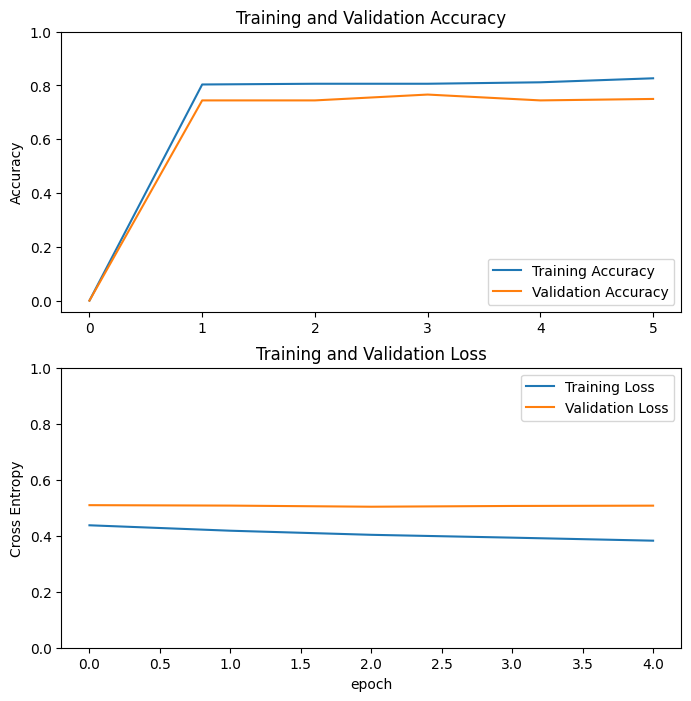

In [ ]:
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
class_names

['bleached_corals', 'healthy_corals']

In [ ]:
base_model2 = model2.layers[4]
base_model2.trainable = True
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model2.layers))

# Fine-tune from this layer onwards
fine_tune_at = 120

### START CODE HERE

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model2.layers[:fine_tune_at]:
    layer.trainable = False

# Define a BinaryCrossentropy loss function. Use from_logits=True
loss_function=tf.keras.losses.BinaryCrossentropy(from_logits=True)
# Define an Adam optimizer with a learning rate of 0.1 * base_learning_rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.1*base_learning_rate)
# Use accuracy as evaluation metric
metrics=['accuracy']

### END CODE HERE

model2.compile(loss=loss_function,
              optimizer = optimizer,
              metrics=metrics)

Number of layers in the base model:  154


In [ ]:
model2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 160, 160, 3)       0         
                                                                 
 tf.math.truediv_1 (TFOpLam  (None, 160, 160, 3)       0         
 bda)                                                            
                                                                 
 tf.math.subtract_1 (TFOpLa  (None, 160, 160, 3)       0         
 mbda)                                                           
                                                                 
 mobilenetv2_1.00_160 (Func  (None, 5, 5, 1280)        2257984   
 tional)                                                         
                                                           

In [ ]:
fine_tune_epochs = 5
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model2.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)

Epoch 5/10
24/24 [==============================] - 31s 1s/step - loss: 0.4770 - accuracy: 0.7497 - val_loss: 0.5028 - val_accuracy: 0.7283
Epoch 6/10
24/24 [==============================] - 24s 956ms/step - loss: 0.4030 - accuracy: 0.8336 - val_loss: 0.5357 - val_accuracy: 0.7609
Epoch 7/10
24/24 [==============================] - 24s 1s/step - loss: 0.3816 - accuracy: 0.8309 - val_loss: 0.5201 - val_accuracy: 0.7337
Epoch 8/10
24/24 [==============================] - 24s 992ms/step - loss: 0.4068 - accuracy: 0.8187 - val_loss: 0.4593 - val_accuracy: 0.7772
Epoch 9/10
24/24 [==============================] - 24s 989ms/step - loss: 0.4063 - accuracy: 0.8106 - val_loss: 0.4453 - val_accuracy: 0.7989
Epoch 10/10
24/24 [==============================] - 24s 1s/step - loss: 0.3383 - accuracy: 0.8512 - val_loss: 0.4597 - val_accuracy: 0.7935


In [ ]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

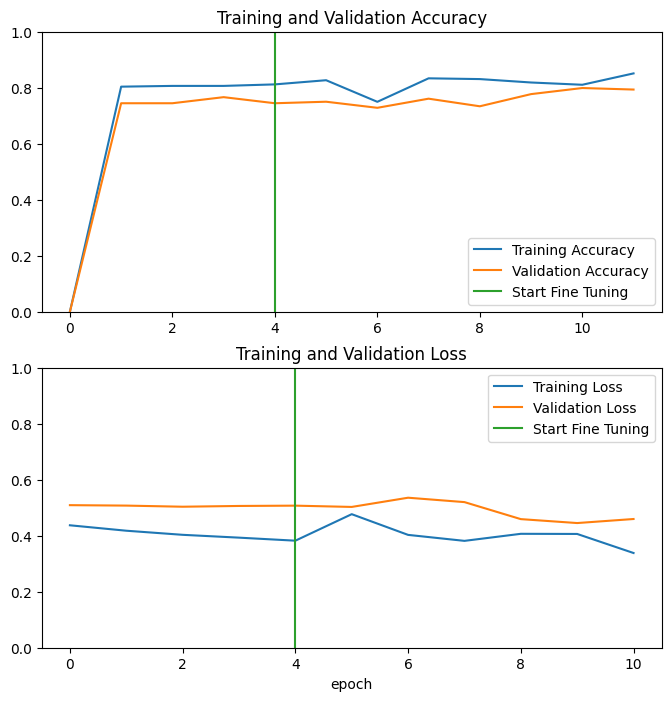

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
model2.save("corals.h5")
model2.save_weights("corals_weights.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
updated 1 package and audited 36 packages in 0.442s

3 packages are looking for funding
  run `npm fund` for details

found 2 moderate severity vulnerabilities
  run `npm audit fix` to fix them, or `npm audit` for details


In [ ]:
!streamlit run app.py &>/content/logs.txt &

In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.106.197.126


Use this as the password for the below site.

In [ ]:
!npx localtunnel --port 8501

npx: installed 22 in 1.735s
your url is: https://eighty-trees-listen.loca.lt
^C
